# Time Value of Money

We have covered the present value and future value, so now I want to first introduce a function to find the value of different cash flows given different timings and rates of return. The function below is going to take as an argument a cashflows list where each element is a tuple with the nominal value, the discount rate for the period and the number of years in the future. This way we can make a function which returns the total TVM.

In [1]:
#Build a function to find TVM of cash flows
def TVM(cash_flows):
    #Start with a present value of 0
    PV = 0
    
    #For each flow, calculate the PV and add it
    for flow in cash_flows:
        P = flow[0]
        r = flow[1]
        t = flow[2]
        #Find the present value for the cashflow
        PV_i = P / (1+r)**t
        PV += PV_i
    return PV
PV = TVM([(100,.01,1),(200,.015,2),(100,.02,3)])
print(PV)

387.37448417423155


# Annuities

Annuities are financial instruments which return a set amount of money each year for a given number of years. An example is an annuity that rewards the holder with $100 every single year for 5 years. The way to calculate it's value is shown below given a discount rate of 5% held constant the whole time.

In [2]:
PV = TVM([(100, .05, 1), (100, .05, 2), (100, .05, 3), (100, .05, 4), (100, .05, 5)])
print(PV)

432.9476670630819


If we can assume that we are also able to invest each cash flow that we get at 5% after the fact, then our future value of the annuity can be found easily like below.

In [3]:
#In terms of future value, if we invested each cash flow at r=5% as we get it, we would have...
FV = PV * (1.05) ** 5
print(FV)

552.5631250000001


In [4]:
#Bringing back our timeline function
import matplotlib.pyplot as plt
def timelinePlot(periods,values):
#Create our plot
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)
    
    #Set the limits of our plots (in terms of values, not dimensions)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    #Set the minimums that we will be plotting in (we give a 1 or 10% margin on each side)
    xmin = 1
    xmax = 9
    
    #Set the y of where our plot will be centered around, 5 is the middle
    y = 5
    
    #Set height for our ticks
    height = 1
    
    #Get the spacing between each tick
    delta = (xmax-xmin)/periods
    
    #Create the positions for each tick
    positions = [xmin+delta*x for x in list(range(periods+1))]
    
    #Plot the horizontal line
    plt.hlines(y, xmin, xmax, color='grey')

    for t in range(periods+1):
        #Plot the tick
        plt.vlines(positions[t], y - .5, y + .5, color='grey')
        
        #Plot the time period below
        plt.text(positions[t], y-1.2, t, horizontalalignment='center',fontsize=14)
        
    #Get rid of axes
    plt.axis('off')
    
    for value in values:
        #Plot a red dot on the year that our value is at
        plt.plot(positions[value[1]],y, 'ro', ms = 15, mfc = 'r')
        #Plot the values above, use rounding to keep it clean
        plt.text(positions[value[1]], y+1.2, "$"+str(round(value[0],1)), horizontalalignment='center',fontsize=18)

    
    plt.show()

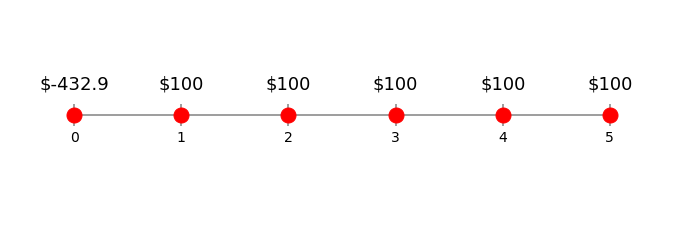

In [5]:
#Plot our the cash flows
payments = [(-PV,0)] + [(100,x) for x in range(1,6)]
timelinePlot(5,payments)

## Annuity Equation

While we could find the value of an annuity in a manual manner like above, there is actually an equation which will give us the correct present value. 

$$ PV = P \cdot \frac{1-(1+r)^{-n}}{r}$$

where

$ PV = \text{Present Value} $

$ P = \text{Payment} $

$ r = \text{Discount Rate} $

$ n = \text{Number of Periods} $

In [6]:
#There is an equation which represents the present value of an annuity
#P is payment, n is the number of years, and r is our discount rate
def annuity_TVM(P, n, r):
    annuity_factor = (1-(1+r)**-n)/r
    PV = annuity_factor * P
    return PV
print(annuity_TVM(100,5,.05))

432.94766706308224


## The Annuity Factor

The annuity factor can be thought of as a multiplier to the payments. In the case that the rate is 0%, the annuity factor is going to be n (the total number of payments) because there is no discounting. As r becomes larger and larger the annuity factor shrinks because the payments are worth less and less. Let's find what the annuity factor will be with 10 years and different values of r.

In [7]:
#Annuity factors discount the number of payments we get
#Look at how the factors vary based on different discount rates
rates = [0,.02,.05,.1]
n = 10
for r in rates:
    if r==0:
        annuityFactor = n
    else:
        annuityFactor = (1-(1+r)**-n)/r
    print(annuityFactor)

10
8.982585006242244
7.721734929184818
6.144567105704685


Let's visualize what the value of each payment is with the different rates to understand this better. If we assume payments are \$100 we can iterate through each rate to see the values.

In [8]:
P = 100
n = 10
rates = [0, .02, .05, .1]

PV = []
for r in rates:
    PV.append([P / (1 + r) ** t for t in range(1, n+1)])
    print("r={}".format(r))
    print("Payment Values:")
    print(PV[-1])
    print()

r=0
Payment Values:
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

r=0.02
Payment Values:
[98.0392156862745, 96.11687812379854, 94.23223345470444, 92.38454260265142, 90.57308098299158, 88.7971382186192, 87.05601786139138, 85.34903711901114, 83.67552658726582, 82.03482998751551]

r=0.05
Payment Values:
[95.23809523809524, 90.70294784580499, 86.3837598531476, 82.27024747918819, 78.35261664684589, 74.62153966366274, 71.06813301301213, 67.6839362028687, 64.46089162177971, 61.39132535407592]

r=0.1
Payment Values:
[90.9090909090909, 82.64462809917354, 75.13148009015775, 68.30134553650706, 62.0921323059155, 56.44739300537772, 51.315811823070646, 46.65073802097331, 42.40976183724846, 38.55432894295314]



Now that we have the data, we can plot it.

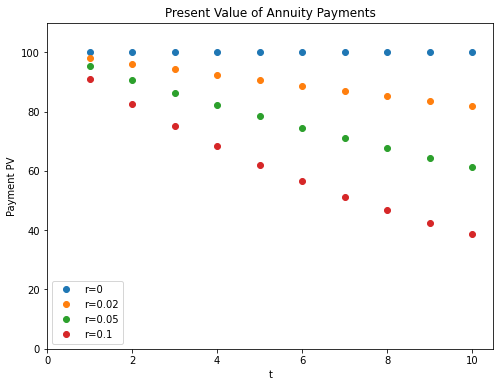

In [9]:
plt.rcParams["figure.figsize"] = [8,6]

#And now, let's graph them
for payments, r in zip(PV, rates):
    #Use "o" so we get points instead of a line
    plt.plot(list(range(1,n+1)), payments, "o", label="r="+str(r))
    
    #Set the limits so that we have 0 as the left minimum and 5.5 as the right (so we don't cut off points)
    plt.xlim([0,10.5])
    plt.ylim([0,110])
plt.xlabel("t")
plt.ylabel("Payment PV")
plt.title("Present Value of Annuity Payments")
plt.legend()
plt.show()

Of course, we can sum these values to find the annuity present value. Let's see how they compare below.

In [10]:
#Iterate through and find the present values
for r, payments in zip(rates, PV):
    print("r={}".format(r))
    print("Payment Values: {}".format(sum(payments)))
    print()

r=0
Payment Values: 1000.0

r=0.02
Payment Values: 898.2585006242236

r=0.05
Payment Values: 772.1734929184811

r=0.1
Payment Values: 614.456710570468



In [11]:
for r, payments in zip(rates, PV):
    print("r={}".format(r))
    #If r is 0 then there will be division by 0
    #Formula is n*payment in that case
    if r > 0:
        print("Payment Values: {}".format(annuity_TVM(100,10,r)))
    else:
        print("Payment Values: {}".format(10 * 100))
    print()

r=0
Payment Values: 1000

r=0.02
Payment Values: 898.2585006242244

r=0.05
Payment Values: 772.1734929184818

r=0.1
Payment Values: 614.4567105704685



## Annuity Due

While regular annuities pay off at the end of each year, there is a such thing as an annuity due. These instruments actually pay off in the beginning of the year instead. We can visualize a 5 year annuity due below.

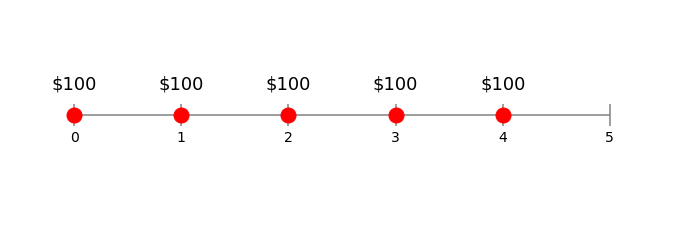

In [12]:
plt.rcParams["figure.figsize"] = [12,4]

#There is also a such thing as an annuity due, which is an annuity where you get your payment one period earlier
#So on a timeline an annuity due for 5 years would look like this
payments = []
for x in range(0,5):
    payments.append((100,x))

timelinePlot(5,payments)
#You immediately get money in period 0, but get none on period 5 since you already got your 5 payments

The way that this will change TVM is that now each payment is discounted by one less year. For example, the first payment was discounted by 1 year but now it is discounted by 0 years. The second payment was discounted by 2 years but now it will be only discounted by 1 year. Compare how we can calcualte a present value below for an annuity and the same one if it were changed to an annuity due.

In [13]:
#Computing present value for the annuity
PV1 = 0
for t in range(1,6):
    PV1 += 100/(1.05)**t
print(PV1)

#Computing present value for the annuity due
PV2 = 0
for t in range(1,6):
    #Notice the t-1
    PV2 += 100/(1.05)**(t-1)
print(PV2)

432.9476670630819
454.595050416236


One way to think about the difference between an annuity due and an annuity is that every payment is being shifted. Because of this there is a relationship that will hold between the two:

$$a_D = a \cdot (1+r)$$

where 

$a_D = \text{Annuity Due}$

$a = \text{Annuity}$

$r = \text{Discount Rate}$

Confirm it with the values below.

In [14]:
#It is the same value just with 1.05 multiplied
print(PV1 * 1.05)

454.595050416236


## Semi-Annual Annuity Payments

We can convert an annuity to semi-annual payments by changing the annualized rate to a semi-annual one. Then we multiply the number of compounding periods by 2. This will give us the correct valuation. The idea here is that 2n payments at the semi-annual rate should equate to n payments at the annual rate.

Let's say there is an annualized rate of 6%. Our first step is going to be converting it to the semi-annual rate. We will begin with just one year, and two payments.

In [15]:
#Convert to semi-annual
r = (1.06)**.5-1
print(r)

0.02956301409869999


Now, with the semi-annual rate, we compound by half years. So while our payment is in period .5, we actually discount with 1 as t but r as 2.95%. Check out the present value of the payments halfway through the first year and at the end of the first year.

In [16]:
#Show semi-annual payments present value
p1 = 500/(1+r)**1
p2 = 500/(1+r)**2
PV = p1+p2
print(PV)

957.3410443861794


If you have a strong preference to still use annualized, you can also keep the yearly r but use decimals to represent half years.

In [17]:
#Notice we get the same PV!
r = .06
p1 = 500/(1+r)**.5
p2 = 500/(1+r)**1
PV = p1+p2
print(PV)

957.3410443861792


As a check, let's see what the future value of these two payments would come out to be. Our payment at time t=1 has a future value of itself because that is the end of our measurement. For the payment at time t=.5, we need to compound half a year's worth of interest. Our future value comes out to be $1014.78.

In [18]:
#Find the future value of the two payments
FV = 500*1.06**.5+500
print(FV)

1014.78150704935


When we divide the future value by the present value we see that clearly the rate of return comes out to being 6%. This is good news, we are doing it correctly.

In [19]:
print(FV/PV - 1)

0.06000000000000005


## The Difference between an Annualized and Nominal Rate

The point of an annualized rate is that it is what you will get in terms of yearly return. If we had a rate that was not annualzied, a nominal rate, then we would just divide by the number of periods. The agreement that you make is that you get or pay n periods of interest with a rate of r/n per period. Notice how the present value is lower. This is because the compounding will be larger. With the annualized rate, our semi-annual r was around 2.95% but in this case it would be 3% leading to a larger annual return than 6%!

In [20]:
#The present value is now lower
r = .06/2
p1 = 500/(1+r)**1
p2 = 500/(1+r)**2
PV = p1+p2
print(PV)

956.7348477707607


The effective annual rate of return ends up coming out to about 6.09% in this case which is larger.

In [21]:
#And now since we can still re-invest in the same way...
print((500*1.03+500)/PV - 1)

0.060899999999999954


## Converting to an Annualized Rate

Recall that we can convert to an annualized rate by doing the following:

$$ r_a = (1 + \frac{r_n}{f})^f - 1 $$

where 

$$ r_a = \text{Annualized Rate} $$
$$ r_n = \text{Nominal Rate} $$
$$ f = \text{Payment frequency} $$

In [22]:
#Annualize the rate
r = .06
r = (1+r/2)**2-1
print(r)

0.060899999999999954


The following shows three equivalent ways to calculate the future value of the payments. The first being the payments with the semi-annual rate applied to the mid year payment and the end payment, the second being the present value multiplied by the annualized rate, and finally the last one as the same calculation as the first one except converting the annualized rate to the equivalent for a half year.

In [23]:
#So using the annualized rate on our PV
print((500*1.03+500))
print((p1+p2)*(1+r))
print(500*(1+r)**.5+500)

1015.0
1015.0
1015.0


## Extending to 4 Periods

Now that we get how to do this with two periods, we can move on to four periods (or in general any number of periods). If we have 5 years at an annualzied rate of 6% paid in quarters, the following is the calculation of the annuity value. We can say that each year $1000 is paid, meaning the coupon is $250 a quarter.

In [24]:
#Set up the basic variables

#Variable to track the present value
PV = 0

#The number of payment periods
n = 5*4

#The annualzied rate
r = .06

#The quarterly payment
coupon = 1000/4

#Go through each period
for x in range(1,n+1):
    #The time is in quarter years so divide by 4
    t = x/4
    
    #Add in the present value
    PV += coupon / (1+r)**t
print(PV)

4305.9914937938065


In [25]:
#Then way 1 to do nominal interest rates for the same
PV = 0
n = 5*4
r = .06/4
coupon = 1000/4
for x in range(1,n+1):
    t = x
    PV += coupon / (1+r)**t
print(PV)

4292.159696270487
